In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Problem 1: Bird baths in Australia

In [3]:
# load the data
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-08-31/bird_baths.csv'
birds = pd.read_csv(url)
birds.head()

,survey_year,urban_rural,bioregions,bird_type,bird_count
0,2014.0,Urban,South Eastern Queensland,Bassian Thrush,0
1,2014.0,Urban,South Eastern Queensland,Chestnut-breasted Mannikin,0
2,2014.0,Urban,South Eastern Queensland,Wild Duck,0
3,2014.0,Urban,South Eastern Queensland,Willie Wagtail,0
4,2014.0,Urban,South Eastern Queensland,Regent Bowerbird,0


Our **goal** is to predict the probability of whether we’ll see a bird at a bird bath in Australia, given info like what kind of bird we’re looking for and whether the bird bath is in an urban or rural location.

We'll focus on birds from the following list.

In [4]:
birds_list = [
    'Noisy Miner',
    'Australian Magpie',
    'Rainbow Lorikeet',
    'Red Wattlebird',
    'Superb Fairy-wren',
    'Magpie-lark',
    'Pied Currawong',
    'Crimson Rosella',
    'Eastern Spinebill',
    'Spotted Dove',
    "Lewin's Honeyeater",
    'Satin Bowerbird',
    'Crested Pigeon',
    'Grey Fantail',
    'Red-browed Finch',
]

**Part 1:** Filter out the bird types that are not on the `birds_list` list.

In [5]:
birds = birds[birds.bird_type.isin(birds_list)]

**Part 2:** Add a `bird` column to the DataFrame, where the value is `1` when `bird_count>0`, and `0` when `bird_count=0`.

In [6]:
birds['bird'] = (birds.bird_count>0).astype(int)
birds.head()

,survey_year,urban_rural,bioregions,bird_type,bird_count,bird
22,2014.0,Urban,South Eastern Queensland,Satin Bowerbird,0,0
24,2014.0,Urban,South Eastern Queensland,Eastern Spinebill,0,0
35,2014.0,Urban,South Eastern Queensland,Red Wattlebird,0,0
44,2014.0,Urban,South Eastern Queensland,Crimson Rosella,0,0
84,2014.0,Urban,South Eastern Queensland,Australian Magpie,0,0


In [7]:
birds.bird.value_counts()

0    11745
1     2550
Name: bird, dtype: int64

Drop the `bird_count` column

In [8]:
birds.drop('bird_count', axis=1, inplace=True)
birds.head()

,survey_year,urban_rural,bioregions,bird_type,bird
22,2014.0,Urban,South Eastern Queensland,Satin Bowerbird,0
24,2014.0,Urban,South Eastern Queensland,Eastern Spinebill,0
35,2014.0,Urban,South Eastern Queensland,Red Wattlebird,0
44,2014.0,Urban,South Eastern Queensland,Crimson Rosella,0
84,2014.0,Urban,South Eastern Queensland,Australian Magpie,0


The next cell uses a `pivot_table` to compute the probability of whether we'll see a bird 

**Part 3:** How likely are you to see birds of different types (Australian Magpie, Crested Pigeon,...) in different locations (rural, urban)?

**Hint**: use `pd.pivot_table`.

In [9]:
probability = birds.pivot_table('bird',index='bird_type', columns='urban_rural', aggfunc = 'mean')
probability

urban_rural,Rural,Urban
bird_type,,
Australian Magpie,0.258503,0.282675
Crested Pigeon,0.095238,0.147416
Crimson Rosella,0.224490,0.135258
Eastern Spinebill,0.295918,0.100304
Grey Fantail,0.282313,0.060790
Lewin's Honeyeater,0.282313,0.075988
Magpie-lark,0.112245,0.193009
Noisy Miner,0.200680,0.354103
Pied Currawong,0.108844,0.189970


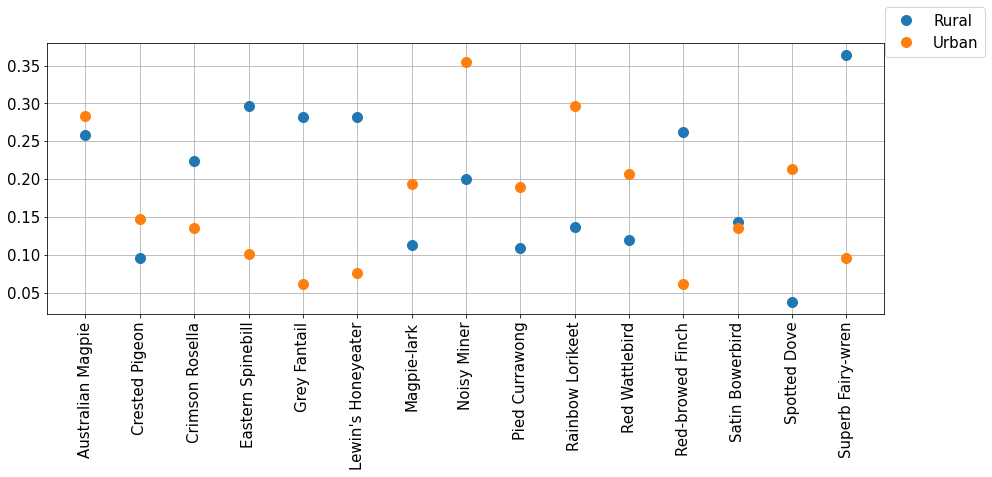

In [10]:
# run this cell to plot probabilities
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(probability.Rural,'o',markersize='10', label='Rural')
ax.plot(probability.Urban,'o',markersize='10', label='Urban')
ax.grid(True)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
fig.legend(fontsize=15)
plt.show()

We'll use the `urban_rural`, `bird_type` and `bioregions` features to try to predict these probabilities.

**Part 4:** Define the feature matrix X (columns `urban_rural`, `bird_type` and `bioregions`) and the target vector y (`bird` column) from the dataframe, and then split X and y into training and testing sets.

In [13]:
X = birds[['urban_rural','bird_type','bioregions']]
y = birds.bird

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

**Part 5:** build a pipeline with the following steps: an imputer, a one-hot-encoder, and a logistic regression model.

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn import set_config
set_config(display='diagram')

In [16]:
# classification pipeline
pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder()),
    ('clf', LogisticRegression(max_iter=5000))
])
pipe

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder()),
                ('clf', LogisticRegression(max_iter=5000))])

Fit your pipeline to the training data

In [17]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder()),
                ('clf', LogisticRegression(max_iter=5000))])

Use the `predict_proba` method to compute the seeing-a-bird probability on the testing data.

In [18]:
pipe['clf'].classes_

array([0, 1])

In [19]:
y_test_proba = pipe.predict_proba(X_test)[:,1]

Run the following two cells.

In [20]:
# this cell creates a dataframe with the computed probabilities
results = X_test.copy()
results['proba'] = y_test_proba
results

,urban_rural,bird_type,bioregions,proba
156200,Rural,Crimson Rosella,Victorian Midlands,0.212419
143187,Urban,Crimson Rosella,South East Coastal Plain,0.127216
39990,Urban,Rainbow Lorikeet,Sydney Basin,0.259439
120655,Urban,Spotted Dove,Sydney Basin,0.168421
101951,Urban,Crimson Rosella,South Eastern Queensland,0.139663
...,...,...,...,...
67355,Urban,Magpie-lark,Sydney Basin,0.168497
1013,Urban,Grey Fantail,South Eastern Queensland,0.120245
30286,Urban,Red Wattlebird,Sydney Basin,0.175157
13037,Urban,Eastern Spinebill,South Eastern Queensland,0.144917


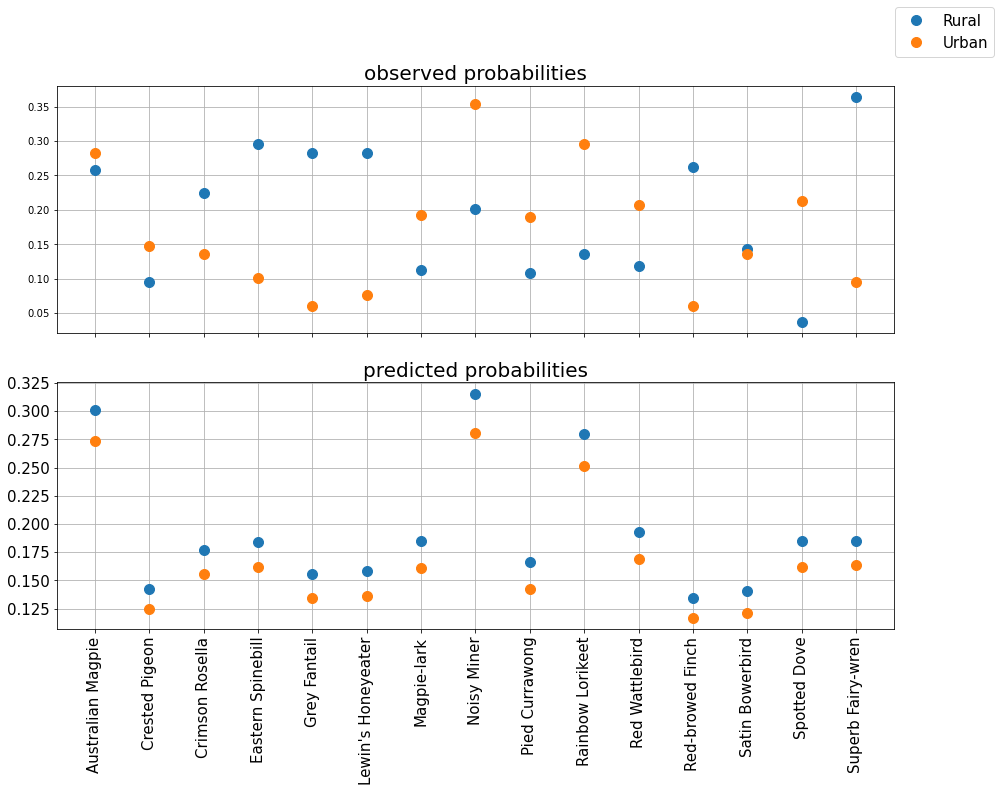

In [21]:
# this cell plots the observed and computed probabilities
probability_test = pd.pivot_table(data=results, values='proba', index='bird_type', columns='urban_rural', aggfunc = 'mean')

fig, ax = plt.subplots(2,1,figsize=(15,10),sharex=True)

ax[0].plot(probability.Rural,'o',markersize='10', label='Rural')
ax[0].plot(probability.Urban,'o',markersize='10', label='Urban')
ax[0].grid(True)
ax[0].set_title('observed probabilities', fontsize=20)

ax[1].plot(probability_test.Rural,'o',markersize='10')
ax[1].plot(probability_test.Urban,'o',markersize='10')
ax[1].grid(True)
ax[1].set_title('predicted probabilities', fontsize=20)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
fig.legend(fontsize=15)
plt.show()

The predicted probabilities don't look great. 

**Part 6:** Add polynomial features (of degree 2) to your pipeline, and repeat the Part 5 steps

In [22]:
# classification pipeline
from sklearn.preprocessing import PolynomialFeatures
pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder()),
    ('poly_features', PolynomialFeatures(degree=2,include_bias=False)),
    ('clf', LogisticRegression(max_iter=5000))
])
pipe

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder()),
                ('poly_features', PolynomialFeatures(include_bias=False)),
                ('clf', LogisticRegression(max_iter=5000))])

In [23]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder()),
                ('poly_features', PolynomialFeatures(include_bias=False)),
                ('clf', LogisticRegression(max_iter=5000))])

In [24]:
y_test_proba = pipe.predict_proba(X_test)[:,1]

In [25]:
results = X_test.copy()
results['proba'] = y_test_proba
results

,urban_rural,bird_type,bioregions,proba
156200,Rural,Crimson Rosella,Victorian Midlands,0.545220
143187,Urban,Crimson Rosella,South East Coastal Plain,0.071778
39990,Urban,Rainbow Lorikeet,Sydney Basin,0.383012
120655,Urban,Spotted Dove,Sydney Basin,0.183036
101951,Urban,Crimson Rosella,South Eastern Queensland,0.013704
...,...,...,...,...
67355,Urban,Magpie-lark,Sydney Basin,0.196677
1013,Urban,Grey Fantail,South Eastern Queensland,0.082572
30286,Urban,Red Wattlebird,Sydney Basin,0.168617
13037,Urban,Eastern Spinebill,South Eastern Queensland,0.041571


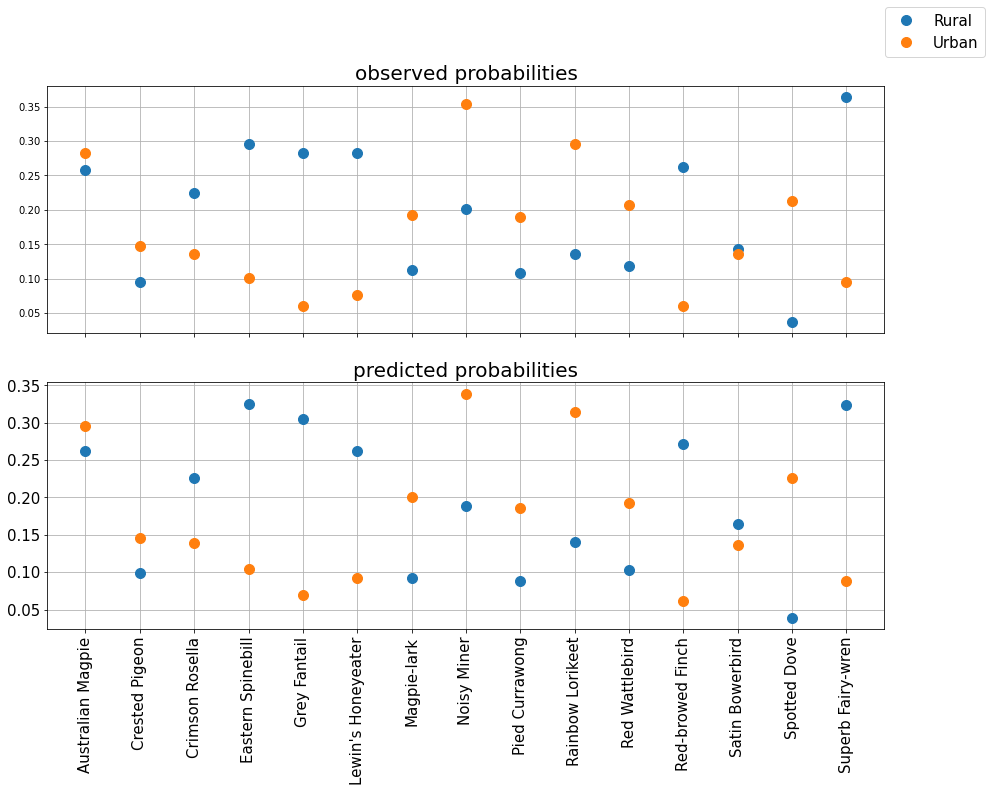

In [26]:
# this cell plots the observed and computed probabilities
probability_test = pd.pivot_table(data=results, values='proba', index='bird_type', columns='urban_rural', aggfunc = 'mean')

fig, ax = plt.subplots(2,1,figsize=(15,10),sharex=True)

ax[0].plot(probability.Rural,'o',markersize='10', label='Rural')
ax[0].plot(probability.Urban,'o',markersize='10', label='Urban')
ax[0].grid(True)
ax[0].set_title('observed probabilities', fontsize=20)

ax[1].plot(probability_test.Rural,'o',markersize='10')
ax[1].plot(probability_test.Urban,'o',markersize='10')
ax[1].grid(True)
ax[1].set_title('predicted probabilities', fontsize=20)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
fig.legend(fontsize=15)
plt.show()